In [1]:
##HEART ATTACK PREDICTION

In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\Medicaldataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [4]:
input, output = df.drop(['Result'], axis=1), df['Result']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, output, train_size=.85)

In [19]:
random = RandomForestClassifier(
        n_estimators=20,
        max_depth=4,
        bootstrap=True
        )
predictions = random.fit(X_train, y_train).predict(X_test)

In [20]:
print(classification_report(predictions, y_test))
print(accuracy_score(predictions, y_test))

              precision    recall  f1-score   support

    negative       1.00      0.96      0.98        85
    positive       0.97      1.00      0.99       113

    accuracy                           0.98       198
   macro avg       0.99      0.98      0.98       198
weighted avg       0.99      0.98      0.98       198

0.9848484848484849


In [27]:
import seaborn as sns
maps = {
    'negative':0,
    'positive':1
}
dfx = df['Result'].map(maps)
dfx = pd.DataFrame(dfx, columns=['Result'])


<Axes: >

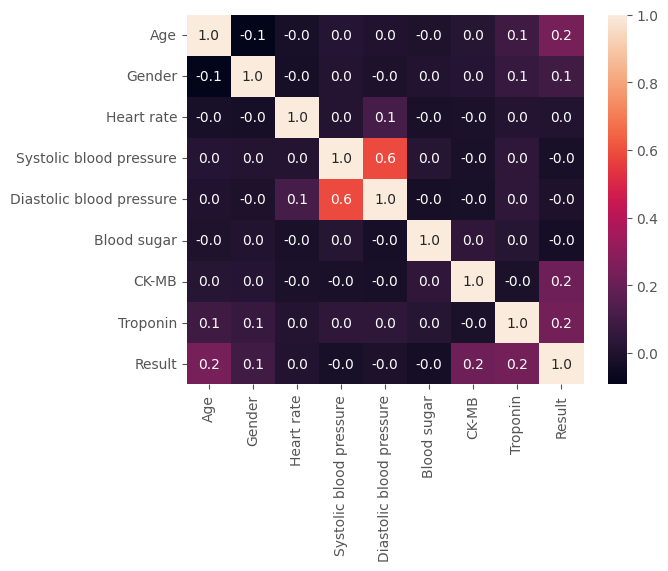

In [33]:
sns.heatmap(dfx.corr(), annot=True, fmt='.1f')

In [41]:
import gradio as gr

In [60]:
def fn(Age, Gender, HeartRate, BP_sys, BP_dias, blood_sugar, ck_mb, troponin):
    inputs = [Age, Gender, HeartRate, BP_sys, BP_dias, blood_sugar, ck_mb, troponin]
    
    pred =  random.predict([inputs])
    if pred[0] == 'positive':
        return ('Positive Risk')
    else:
        return ('No Risk!')

    

In [83]:
interface = gr.Interface(
    fn=fn,
    title='Heart Attack Prediction',
    inputs=[gr.Slider(1,100, label='Age', ), gr.Text(placeholder='1 for Male 0 for Female'), gr.Slider(0,200, label='Heart Rate'), 
            gr.Slider(0,200, label='Blood Pressure(Sys)'), gr.Slider(0,200, label='Blood Pressure(dias)'), gr.Slider(50,250,label='Blood Sugar'),
             gr.Slider(0,100, label='CK-MB'), gr.Slider(0,5,label='Troponin')],
    outputs=gr.Text(placeholder=r'99.9% accurate estimates...'),
    description='Fill in the categories and find an estimate for heart attack (/associated risk level)'
)

In [ ]:
interface.launch(share=True)